In [42]:
import datetime
import json
import os

import numpy as np
import pandas as pd
import seaborn as sns

print(os.getcwd())

dataset_names = {
    'walmart': './data/walmart.csv',
    'eeg': './data/eeg-eye-state_csv.csv',
    'polution': './data/uspollution_pollution_us_2000_2016.csv',
    'airlinedelay': './data/airlinedelaycauses_DelayedFlights.csv',
    'electricity': './data/electricity.txt',
    'solar': './data/solar_AL.txt',
    'traffic': './data/traffic.txt',
    'exchange': './data/exchange_rate.txt',
    'household': './data/household_power_consumption.csv'
}
ds_name = 'walmart'
with open(dataset_names[ds_name], 'r') as file:
    # data_json = json.loa
    # ds(f"[{data_str}]")
    if ds_name == 'household':
        data = pd.read_csv(file, na_values='?')
        data['Time'] = pd.to_datetime(data['Time'],format= '%H:%M:%S' )
        data['Time'] = (data['Time'] - np.datetime64('1900-01-01T00:00:00Z')) / np.timedelta64(1, 's')
        # data['Time'] = data['Time'].total_seconds()
        del data["Date"]
        data =(data-data.min())/(data.max()-data.min())
    elif ds_name in ['eeg', 'polution','airlinedelay']:
        data = pd.read_csv(file)
    elif ds_name == 'walmart':
        df = pd.read_csv(file)
        data = df.pivot(index=["Date","IsHoliday","Dept"], columns=["Store"], values="Weekly_Sales").reset_index()
        data.fillna(data.mean(),inplace=True)
        data["Data"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")
        data["year"] =  pd.DatetimeIndex(data["Data"]).year
        data["month"] =  pd.DatetimeIndex(data["Data"]).month
        data["day"] =  pd.DatetimeIndex(data["Data"]).day
        data["is_holiday"]=data["IsHoliday"].astype(int)

    else:
        data = pd.read_csv(file, header=None)
    data = data.select_dtypes(include=[int,float])
    data.dropna().to_csv(f"{dataset_names[ds_name][:-4]}_cleaned.csv",index=False,header=False)

    print(f"dataset dimension: {data.shape}")



/Users/mirkobristle/Git/MTGNN


/var/folders/5d/q_ch06kd4pgcfyswm4bkmvfm0000gn/T/ipykernel_13740/3456398815.py:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


dataset dimension: (11090, 50)


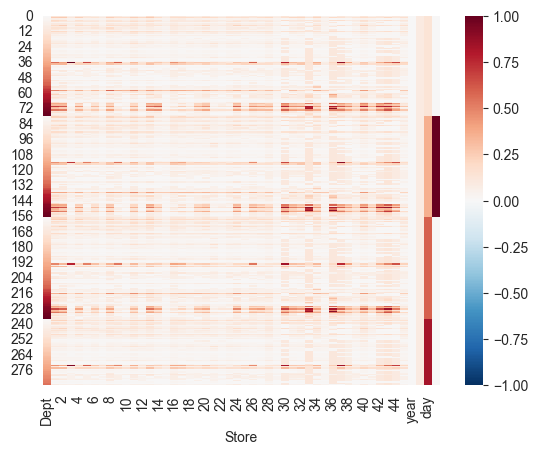

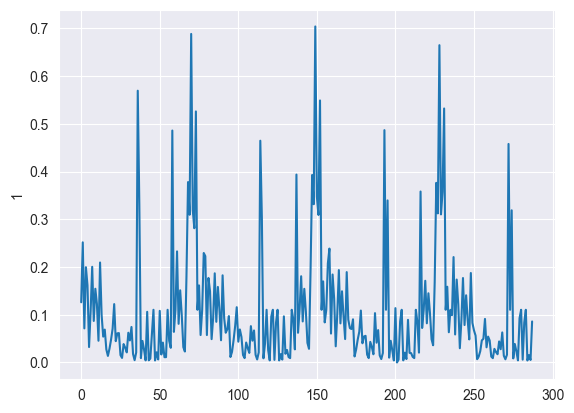

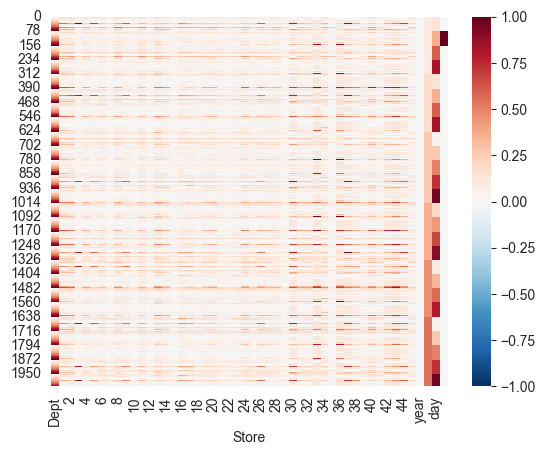

In [43]:
from matplotlib import pyplot
df_norm_col=(data-data.min())/(data.max() -data.min())
sns.heatmap(df_norm_col.iloc[0:12*24],vmin=-1., vmax=1., cmap='RdBu_r',)
pyplot.savefig(f"timeseries_heat_12x24_{ds_name}.png",format="png", bbox_inches="tight")

pyplot.show()
sns.lineplot(df_norm_col.iloc[:,1][0:12*24])
pyplot.savefig(f"timeseries_single_12x24_{ds_name}.png",format="png", bbox_inches="tight")
pyplot.show()
sns.heatmap(df_norm_col.iloc[0:12*24*7],vmin=-1., vmax=1., cmap='RdBu_r',)
pyplot.savefig(f"timeseries_heat_12x24x6_{ds_name}.png",format="png", bbox_inches="tight")
pyplot.show()

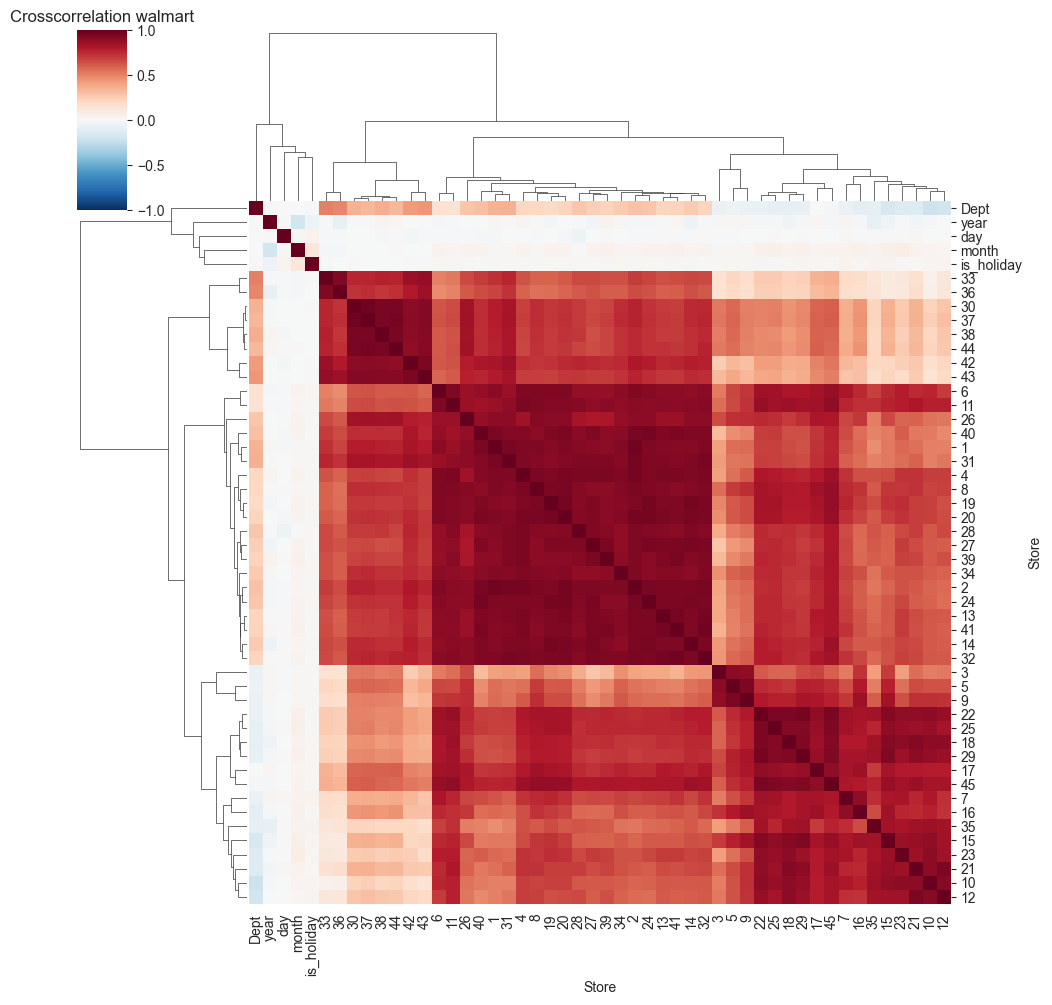

In [44]:
import seaborn as sns

from matplotlib import pyplot
# calculate the correlation matrix
corr = data.dropna().corr()

# plot the heatmap
sns.clustermap(corr,vmin=-1., vmax=1., cmap='RdBu_r',
            xticklabels=corr.columns,
            yticklabels=corr.columns)
pyplot.title(f"Crosscorrelation {ds_name}")
pyplot.savefig(f"crosscorr_{ds_name}.png",format="png", bbox_inches="tight")
pyplot.show()

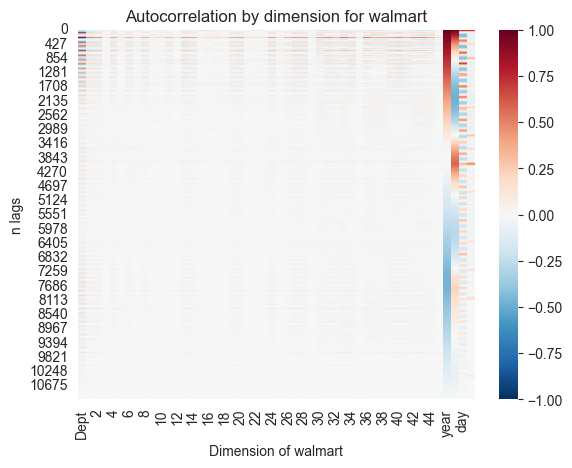

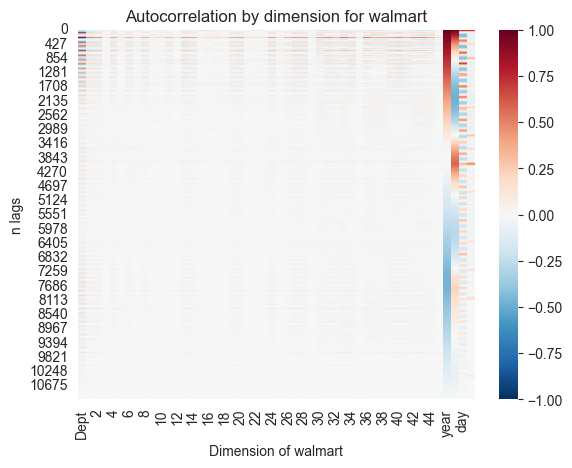

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, acf
import matplotlib.pyplot as plt
import seaborn as sns

# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
acf_data = pd.DataFrame()
for col in data:
    acf_data[col] = acf(x=data[col],nlags=len(data.index))
    # sns.lineplot(acf_data)
sns.heatmap(acf_data,vmin=-1., vmax=1., cmap='RdBu_r')
# p = plot_acf(x=data[6], lags=7587)
# Show the AR as a plot
plt.xlabel(f"Dimension of {ds_name}")
plt.ylabel(f"n lags")
plt.title(f"Autocorrelation by dimension for {ds_name}")
pyplot.savefig(f"autocorr_{ds_name}.png",format="png", bbox_inches="tight")
plt.show()

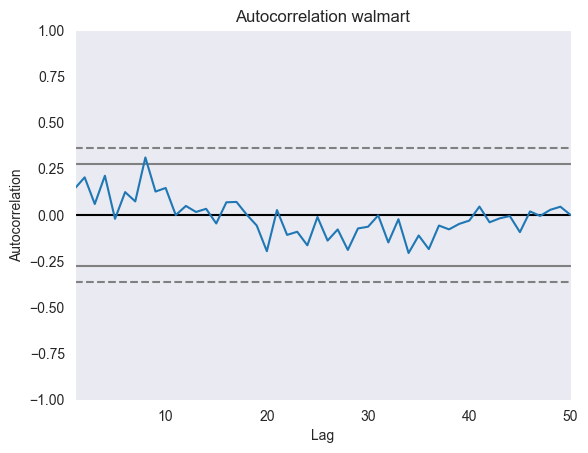

In [49]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
#
# for col in data:
#     autocorrelation_plot(data[col])

autocorrelation_plot(data.iloc[12])
pyplot.title(f"Autocorrelation {ds_name}")
pyplot.show()